In [1]:
import warnings
import numpy as np
import matplotlib.pyplot as plt

from aeon.distances import distance, euclidean_distance, dtw_distance, dtw_alignment_path
from aeon.datasets import load_gunpoint

C:\Users\Divya Tiwari\anaconda3\Lib\site-packages\dask\dataframe\_pyarrow_compat.py:17: FutureWarning: Minimal version of pyarrow will soon be increased to 14.0.1. You are using 11.0.0. Please consider upgrading.
  warnings.warn(


In [2]:
warnings.filterwarnings("ignore")

In [3]:
a = np.array([1, 2, 3, 4, 5, 6])  # Univariate as 1D
b = np.array([2, 3, 4, 5, 6, 7])
d1 = euclidean_distance(a, b)
d2 = dtw_distance(a, b)

In [4]:
d1

2.449489742783178

In [5]:
d2

2.0

In [6]:
print(f" ED 1 = {d1} DTW 1 = {d2}")

 ED 1 = 2.449489742783178 DTW 1 = 2.0


In [7]:
p, d = dtw_alignment_path(a, b)

In [8]:
p

[(0, 0), (1, 0), (2, 1), (3, 2), (4, 3), (5, 4), (5, 5)]

In [9]:
x = np.array([[1, 2, 3, 4, 5, 6]])  # Univariate as 2D
y = np.array([[2, 3, 4, 5, 6, 7]])
d1 = euclidean_distance(x, y)
d2 = dtw_distance(x, y)
print(f" ED 2 = {d1} DTW 2 = {d2}")

 ED 2 = 2.449489742783178 DTW 2 = 2.0


In [10]:
x

array([[1, 2, 3, 4, 5, 6]])

In [11]:
x = np.array([[1, 2, 3, 4, 5, 6], [3, 4, 3, 4, 3, 4]])  # Multivariate, 2 channels
y = np.array([[2, 3, 4, 5, 6, 7], [7, 6, 5, 4, 3, 2]])
d1 = euclidean_distance(x, y)
d2 = dtw_distance(x, y)
print(f" ED 3 = {d1} DTW 3 = {d2}")

 ED 3 = 5.830951894845301 DTW 3 = 34.0


In [12]:
X, y = load_gunpoint()
X.shape

(200, 1, 150)

In [13]:
y[:10]

array(['2', '2', '1', '1', '2', '2', '2', '2', '2', '1'], dtype='<U1')

 class values 2, 1, 2


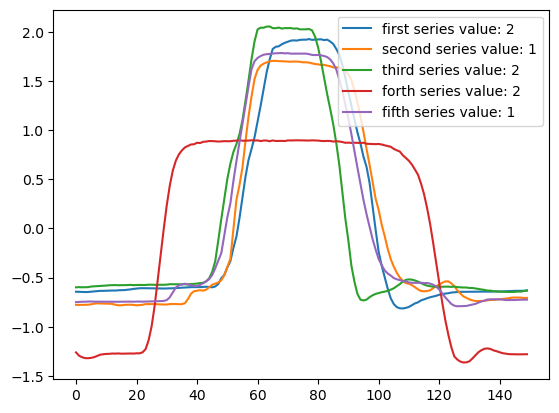

In [14]:
first = X[1][0]
second = X[2][0]
third = X[4][0]
forth = X[6][0]
fifth = X[3][0]
plt.plot(first, label=f"first series value: {y[1]}")
plt.plot(second, label=f"second series value: {y[2]}")
plt.plot(third, label=f"third series value: {y[4]}")
plt.plot(forth, label=f"forth series value: {y[6]}")
plt.plot(fifth, label=f"fifth series value: {y[3]}")
plt.legend()
print(f" class values {y[1]}, {y[2]}, {y[4]}")

In [15]:
d1 = distance(first, second, metric='euclidean')
d2 = euclidean_distance(first, third)
d3 = euclidean_distance(second, third)

# Theoretically, distance between first and third should be less than that between first and second or second and third
# i.e. d2<d1 and d2<d3

In [16]:
print('d1 = ', d1)
print('d2 = ', d2)
print('d3 = ', d3)

d1 =  2.490586847171778
d2 =  6.307592298519925
d3 =  6.618889405616554


In [17]:
d1 = dtw_distance(first, second)
d2 = dtw_distance(first, third)
d3 = dtw_distance(second, third)
print('d1 = ', d1)
print('d2 = ', d2)
print('d3 = ', d3)

d1 =  1.733128174164524
d2 =  0.5299968542651227
d3 =  3.666430398991013


In [18]:
d4 = dtw_distance(fifth, second)
d5 = dtw_distance(fifth, third)
d6 = dtw_distance(second, third, window = 0)
print('d4 = ', d4)
print('d5 = ', d5)
print('d6 = ', d6)

d4 =  0.24390481855289933
d5 =  2.518610999089409
d6 =  43.80969696378307


In [19]:
d4 = euclidean_distance(fifth, second)
d5 = euclidean_distance(fifth, third)
d6 = euclidean_distance(second, third)
print('d4 = ', d4)
print('d5 = ', d5)
print('d6 = ', d6)

d4 =  2.6982090555547185
d5 =  4.393621051732576
d6 =  6.618889405616554


Euclidean distance a to b = 8.12403840463596
Euclidean distance a to c = 5.916079783099616
Zero window DTW distance (Squared Euclidean) from a to b = 66.0
Squared Euclidean =  66.00000000000001
DTW distance (full window) a to b = 1.0
DTW distance (20% warping window) a to b = 1.0


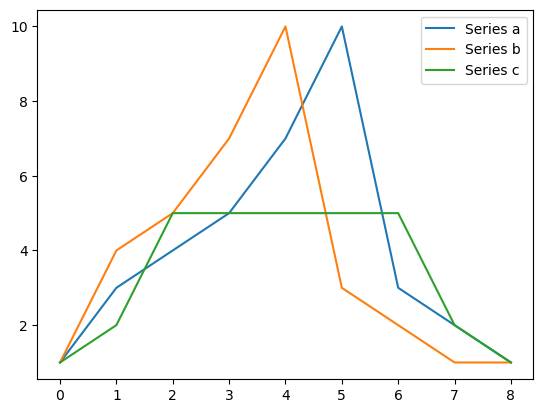

In [20]:
a = np.array([1, 3, 4, 5, 7, 10, 3, 2, 1])
b = np.array([1, 4, 5, 7, 10, 3, 2, 1, 1])
c = np.array([1, 2, 5, 5, 5, 5, 5, 2, 1])
plt.plot(a, label="Series a")
plt.plot(b, label="Series b")
plt.plot(c, label="Series c")
plt.legend()
d1 = euclidean_distance(a, b)
d2 = euclidean_distance(a, c)
print("Euclidean distance a to b =", d1)
print("Euclidean distance a to c =", d2)
d4 = dtw_distance(a, b, window=0.0)
d5 = dtw_distance(a, b, window=1.0)
d6 = dtw_distance(a, b, window=0.2)  #cDTW
d3 = euclidean_distance(a, b) ** 2
print("Zero window DTW distance (Squared Euclidean) from a to b =", d4)
print("Squared Euclidean = ", d3)
print("DTW distance (full window) a to b =", d5)
print("DTW distance (20% warping window) a to b =", d6)